<a href="https://colab.research.google.com/github/UtkarshGupta048/Data-Analytics/blob/main/car_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [59]:
import pickle

In [5]:
from google.colab import files
uploaded=files.upload()

Saving quikr_car.csv to quikr_car.csv


In [6]:
df=pd.read_csv("quikr_car.csv")

In [7]:
df.head(10)

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel
5,Ford EcoSport Titanium 1.5L TDCi,Ford,2015,Ask For Price,"59,000 kms",Diesel
6,Ford Figo,Ford,2012,"1,75,000","41,000 kms",Diesel
7,Hyundai Eon,Hyundai,2013,"1,90,000","25,000 kms",Petrol
8,Ford EcoSport Ambiente 1.5L TDCi,Ford,2016,"8,30,000","24,530 kms",Diesel
9,Maruti Suzuki Alto K10 VXi AMT,Maruti,2015,"2,50,000","60,000 kms",Petrol


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


In [9]:
df.shape

(892, 6)

In [10]:
df.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [11]:
df=df[~(df["kms_driven"].isnull() & df["fuel_type"].isnull())]
df

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel
...,...,...,...,...,...,...
886,Toyota Corolla Altis,Toyota,2009,"3,00,000","1,32,000 kms",Petrol
888,Tata Zest XM Diesel,Tata,2018,"2,60,000","27,000 kms",Diesel
889,Mahindra Quanto C8,Mahindra,2013,"3,90,000","40,000 kms",Diesel
890,Honda Amaze 1.2 E i VTEC,Honda,2014,"1,80,000",Petrol,NaN


In [12]:
df['year']=df['year'].astype(int)

In [13]:
df['Price'] = df['Price'].str.replace(',', '', regex=False)
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 840 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        840 non-null    object 
 1   company     840 non-null    object 
 2   year        840 non-null    int64  
 3   Price       819 non-null    float64
 4   kms_driven  840 non-null    object 
 5   fuel_type   837 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 78.2+ KB


In [15]:
df['kms_driven'] = df['kms_driven'].str.replace(' kms', '', regex=False)
df['kms_driven'] = df['kms_driven'].str.replace(',', '', regex=False)
df['kms_driven'] = pd.to_numeric(df['kms_driven'], errors='coerce').astype('Int64')


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 840 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        840 non-null    object 
 1   company     840 non-null    object 
 2   year        840 non-null    int64  
 3   Price       819 non-null    float64
 4   kms_driven  838 non-null    Int64  
 5   fuel_type   837 non-null    object 
dtypes: Int64(1), float64(1), int64(1), object(3)
memory usage: 79.0+ KB


In [17]:
df['Price'].isnull().sum()

np.int64(21)

In [18]:
df=df[~df['kms_driven'].isnull()]

In [19]:
df['fuel_type'].unique()

array(['Petrol', 'Diesel', nan, 'LPG'], dtype=object)

In [20]:
df=df[~df['fuel_type'].isnull()]

In [21]:
df['fuel_type'].unique()

array(['Petrol', 'Diesel', 'LPG'], dtype=object)

In [22]:
df['company'].unique()

array(['Hyundai', 'Mahindra', 'Maruti', 'Ford', 'Skoda', 'Audi', 'Toyota',
       'Renault', 'Honda', 'Datsun', 'Mitsubishi', 'Tata', 'Volkswagen',
       'Chevrolet', 'Mini', 'BMW', 'Nissan', 'Hindustan', 'Fiat', 'Force',
       'Mercedes', 'Land', 'Jaguar', 'Jeep', 'Volvo'], dtype=object)

In [23]:
df.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,80000.0,45000,Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,425000.0,40,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,NaN,22000,Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,325000.0,28000,Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,575000.0,36000,Diesel


In [24]:
df['name']=df['name'].str.split(" ").str.slice(0,3).str.join(' ')

In [25]:
df.head(10)

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000.0,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000.0,40,Diesel
2,Maruti Suzuki Alto,Maruti,2018,NaN,22000,Petrol
3,Hyundai Grand i10,Hyundai,2014,325000.0,28000,Petrol
4,Ford EcoSport Titanium,Ford,2014,575000.0,36000,Diesel
5,Ford EcoSport Titanium,Ford,2015,NaN,59000,Diesel
6,Ford Figo,Ford,2012,175000.0,41000,Diesel
7,Hyundai Eon,Hyundai,2013,190000.0,25000,Petrol
8,Ford EcoSport Ambiente,Ford,2016,830000.0,24530,Diesel
9,Maruti Suzuki Alto,Maruti,2015,250000.0,60000,Petrol


In [26]:
df=df[(df['year'] != 0) & (df['Price'] != 0) & (df['kms_driven'] != 0)]


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 829 entries, 0 to 889
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        829 non-null    object 
 1   company     829 non-null    object 
 2   year        829 non-null    int64  
 3   Price       809 non-null    float64
 4   kms_driven  829 non-null    Int64  
 5   fuel_type   829 non-null    object 
dtypes: Int64(1), float64(1), int64(1), object(3)
memory usage: 46.1+ KB


In [28]:
df=df.dropna()

In [29]:
df.isnull().sum()

,0
name,0
company,0
year,0
Price,0
kms_driven,0
fuel_type,0


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 809 entries, 0 to 889
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        809 non-null    object 
 1   company     809 non-null    object 
 2   year        809 non-null    int64  
 3   Price       809 non-null    float64
 4   kms_driven  809 non-null    Int64  
 5   fuel_type   809 non-null    object 
dtypes: Int64(1), float64(1), int64(1), object(3)
memory usage: 45.0+ KB


In [31]:
df.describe()

,year,Price,kms_driven
count,809.000000,8.090000e+02,809.0
mean,2012.409147,4.104018e+05,46675.938195
std,3.985054,4.761051e+05,34172.970814
min,1995.000000,3.000000e+04,40.0
25%,2010.000000,1.750000e+05,27000.0
50%,2013.000000,2.999990e+05,41000.0
75%,2015.000000,4.899990e+05,57000.0
max,2019.000000,8.500003e+06,400000.0


<Axes: xlabel='year'>

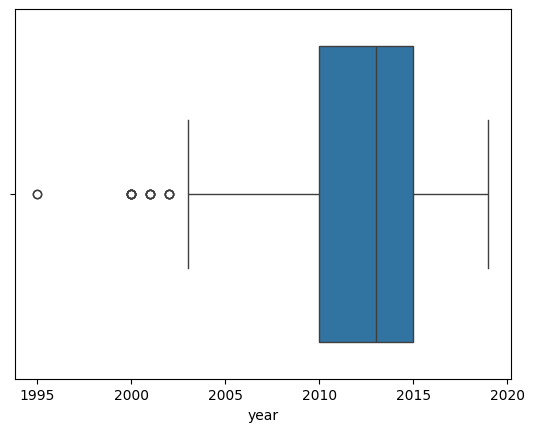

In [32]:
sns.boxplot(x=df['year'])

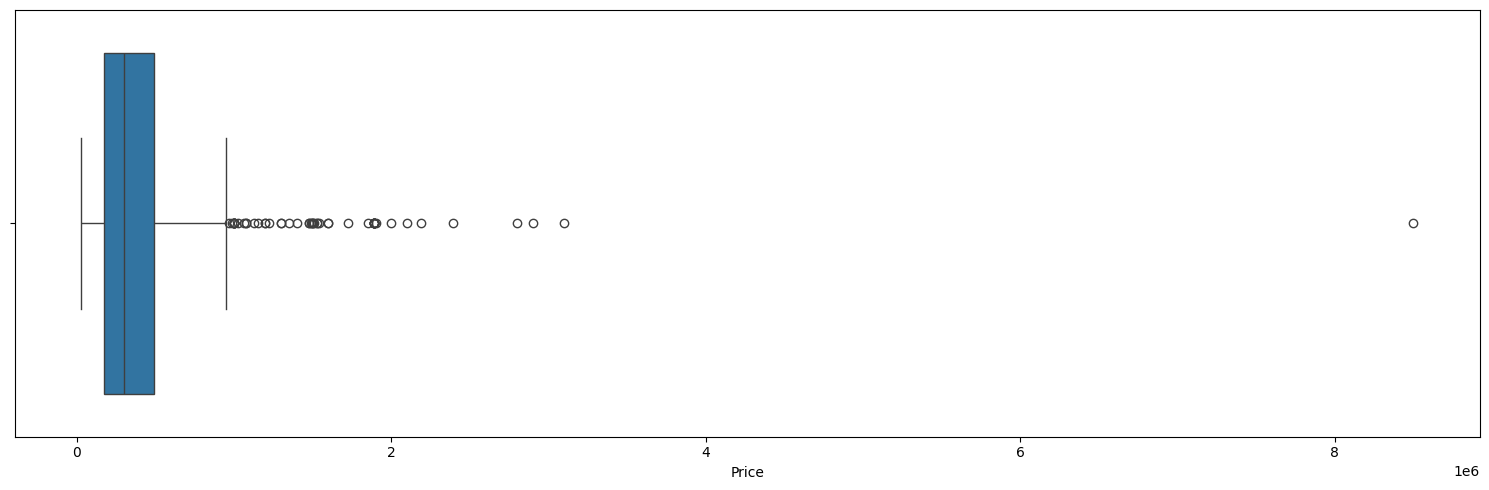

In [33]:
plt.figure(figsize=(15,5))
sns.boxplot(data=df,x='Price')
plt.tight_layout()
plt.show()

In [34]:
df['Price']=df['Price'].astype(int)

**IQR APPLIED for Outliers**

In [35]:
q1_Price=df['Price'].quantile(0.25)
q3_Price=df['Price'].quantile(0.75)
iqr_Price=q3_Price-q1_Price

In [36]:
min_range_price=q1_Price-(1.5*iqr_Price)
max_range_price=q3_Price+(1.5*iqr_Price)

In [37]:
min_range_price,max_range_price

(np.float64(-297498.5), np.float64(962497.5))

In [38]:
df[(df['Price']<min_range_price) | (df['Price']>max_range_price)]                 # IQR not in use

,name,company,year,Price,kms_driven,fuel_type
16,Audi A8,Audi,2017,1000000,4000,Petrol
49,Mitsubishi Pajero Sport,Mitsubishi,2015,1475000,47000,Diesel
73,Mini Cooper S,Mini,2013,1891111,13000,Petrol
79,Mini Cooper S,Mini,2013,1891111,13500,Petrol
86,Volkswagen Vento Highline,Volkswagen,2019,1200000,3600,Diesel
100,BMW 7 Series,BMW,2009,1600000,35000,Petrol
146,Mahindra Scorpio,Mahindra,2015,984999,22000,Diesel
189,Mini Cooper S,Mini,2013,1891111,13000,Petrol
229,Mitsubishi Pajero Sport,Mitsubishi,2015,1475000,47000,Diesel
231,Mercedes Benz GLA,Mercedes,2015,2000000,20000,Diesel


**Model Training Start**

In [39]:
df.to_csv("Cleaned_Car_Data")

In [40]:
ndf=pd.read_csv("Cleaned_Car_Data")

In [41]:
ndf

,Unnamed: 0,name,company,year,Price,kms_driven,fuel_type
0,0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,3,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,4,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,6,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...,...
804,883,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
805,885,Tata Indica V2,Tata,2009,110000,30000,Diesel
806,886,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
807,888,Tata Zest XM,Tata,2018,260000,27000,Diesel


In [42]:
x=df.drop(columns='Price')
y=df['Price']

In [43]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y, test_size=0.2)

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder

In [45]:
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

In [46]:
ohe= OneHotEncoder(handle_unknown='ignore')
ohe.fit(x[['name','company','fuel_type']])

OneHotEncoder(handle_unknown='ignore')

In [47]:
ohe.categories_

[array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
        'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
        'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
        'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat Diesel',
        'Chevrolet Beat LS', 'Chevrolet Beat LT', 'Chevrolet Beat PS',
        'Chevrolet Cruze LTZ', 'Chevrolet Enjoy', 'Chevrolet Enjoy 1.4',
        'Chevrolet Sail 1.2', 'Chevrolet Sail UVA', 'Chevrolet Spark',
        'Chevrolet Spark 1.0', 'Chevrolet Spark LS', 'Chevrolet Spark LT',
        'Chevrolet Tavera LS', 'Chevrolet Tavera Neo', 'Datsun GO T',
        'Datsun Go Plus', 'Datsun Redi GO', 'Fiat Linea Emotion',
        'Fiat Petra ELX', 'Fiat Punto Emotion', 'Force Motors Force',
        'Force Motors One', 'Ford EcoSport', 'Ford EcoSport Ambiente',
        'Ford EcoSport Titanium', 'Ford EcoSport Trend',
        'Ford Endeavor 4x4', 'Ford Fiesta', 'Ford Fiesta SXi', 'Ford Figo',
        '

In [48]:
column_trans = make_column_transformer((OneHotEncoder(categories=ohe.categories_),['name','company','fuel_type']),remainder='passthrough')

In [49]:
lr=LinearRegression()

In [50]:
pipe=make_pipeline(column_trans,lr)

In [51]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
       'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
       'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
       'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat...
                                                                            array(['Audi', 'BMW', 'Chevrolet', 'Datsun', 'Fiat', 'Force', 'Ford',
       'Hindustan', 'Honda', 'Hyundai', 'Jaguar', 'Jeep', 'Land',
       'Mahindra', 'Maruti', 'Mercedes', 'Mini', 'Mitsubishi', 'Nissan',
       'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo'],
      dtype=object),
                                                                            array(['Diesel', 'LPG', 'Petrol'], dtype=object)]),
                                                  ['name', 'company',
                                                   'fuel_type'])])),
                ('linearregression', LinearRegression())])

In [52]:
y_pred=pipe.predict(x_test)
y_pred

array([ 147389.83535244,  628977.97887962,  237420.64920174,
        314482.65173729,   86174.40878072, 1977894.92634068,
        721590.71543005,  394453.96479546,  335031.89378617,
        225211.57606128,  406064.11411744,  510965.75274802,
        192215.97098666,   60444.35694583,  217945.77490435,
        268688.85437697,  469692.28903555,  676750.28429399,
        611434.79322727,   76442.65680788,  340802.35996648,
        243018.27634912,  414813.26971615,  169440.85341663,
        222493.64347538,  208264.23984036,  165329.55754666,
        478624.09905058,  252838.48546476,  758238.64779241,
       1691165.93466605,  238440.53831876,  389075.48577546,
        565948.05604186,  159288.63204058,  234678.24099662,
         32604.03285201,  354177.9926813 ,  270527.75565646,
        368498.36969408,  251295.67809711,  464568.83085655,
        937856.84158549, 2380312.32599577,  406520.47858188,
        554071.43262115,  -50533.89145969,   49076.47964288,
        234994.53323492,

In [53]:
r2_score(y_test,y_pred)

0.5324432922069849

In [56]:
scores = []
for i in range(1000):
  x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=i)
  lr=LinearRegression()
  pipe=make_pipeline(column_trans,lr)
  pipe.fit(x_train,y_train)
  y_pred=pipe.predict(x_test)
  # print(r2_score(y_test,y_pred),i)
  scores.append(r2_score(y_test,y_pred))

In [57]:
np.argmax(scores)
scores[np.argmax(scores)]

0.8402814240516789

In [58]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=np.argmax(scores))
lr=LinearRegression()
pipe=make_pipeline(column_trans,lr)
pipe.fit(x_train,y_train)
y_pred=pipe.predict(x_test)
r2_score(y_test,y_pred)

0.8402814240516789

In [60]:
pickle.dump(pipe,open('Car_LinearRegressionModel.pkl','wb'))

In [64]:
df.head(25)

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
3,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
4,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
6,Ford Figo,Ford,2012,175000,41000,Diesel
7,Hyundai Eon,Hyundai,2013,190000,25000,Petrol
8,Ford EcoSport Ambiente,Ford,2016,830000,24530,Diesel
9,Maruti Suzuki Alto,Maruti,2015,250000,60000,Petrol
10,Skoda Fabia Classic,Skoda,2010,182000,60000,Petrol
11,Maruti Suzuki Stingray,Maruti,2015,315000,30000,Petrol


In [66]:
pipe.predict(pd.DataFrame([['Maruti Suzuki Alto', 'Maruti', 2019, 100, 'Petrol']],
                          columns=['name', 'company', 'year', 'kms_driven', 'fuel_type']))


array([354888.00377835])

In [72]:
pipe.predict(pd.DataFrame([['Ford Figo', 'Ford', 2022, 41000, 'Diesel']],
                          columns=['name', 'company', 'year', 'kms_driven', 'fuel_type']))


array([731940.13878579])